Importing data and getting the features first

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("data.csv")

In [16]:
data = data.drop(columns="Index", axis=1)

In [17]:
data.describe()

,Tumor Volume (cc),Age,Smoking History (years),Survival (years)
count,30.000000,30.000000,30.000000,30.000000
mean,211.333333,57.633333,30.066667,2.616667
std,136.197963,10.873832,16.012782,1.715464
min,30.000000,36.000000,5.000000,0.300000
25%,92.500000,49.250000,16.250000,1.125000
50%,190.000000,58.500000,31.500000,2.300000
75%,315.000000,66.750000,41.500000,3.875000
max,500.000000,75.000000,60.000000,6.000000


In [18]:
X = data.drop(columns="Survival (years)", axis=1)

In [19]:
X.head()

,Tumor Volume (cc),Age,Smoking History (years)
0,150,55,30
1,300,65,40
2,50,45,10
3,400,70,50
4,100,50,20


In [20]:
y = data["Survival (years)"]

In [21]:
y.head()

0    3.0
1    1.0
2    5.0
3    0.5
4    2.0
Name: Survival (years), dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print( X_train.shape[0], X_test.shape[0])

24 6


Scaling features with a min-max scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.transform(X_test)


In [24]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=["Tumor volume (cc)", "Age", "Smoking History (years)"])
X_train_scaled_df.head()

,Tumor volume (cc),Age,Smoking History (years)
0,0.621622,0.794118,0.755556
1,0.189189,0.441176,0.355556
2,0.783784,0.882353,0.733333
3,0.324324,0.558824,0.555556
4,0.189189,0.411765,0.333333


Training a support vector regression model on the unscaled and scaled feature set

In [25]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

svm_reg_scaled = SVR(kernel='linear')
svm_reg_scaled.fit(X_train_scaled, y_train)

y_pred_svm = svm_reg.predict(X_test)
y_pred_svm_scaled = svm_reg_scaled.predict(X_test_scaled)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

mse_svm_scaled = mean_squared_error(y_test, y_pred_svm_scaled)
r2_svm_scaled = r2_score(y_test, y_pred_svm_scaled)

print("SVM Regression MSE (Original):", mse_svm)
print("SVM Regression R^2 (Original):", r2_svm)

print("SVM Regression MSE (Scaled):", mse_svm_scaled)
print("SVM Regression R^2 (Scaled):", r2_svm_scaled)

SVM Regression MSE (Original): 0.3126109977888167
SVM Regression R^2 (Original): 0.8693219238226033
SVM Regression MSE (Scaled): 0.16916831801926205
SVM Regression R^2 (Scaled): 0.9292840286960818


We see there's a difference in the MSE and R^2 between the models for scaled/ unscaled features. Let's visualize this

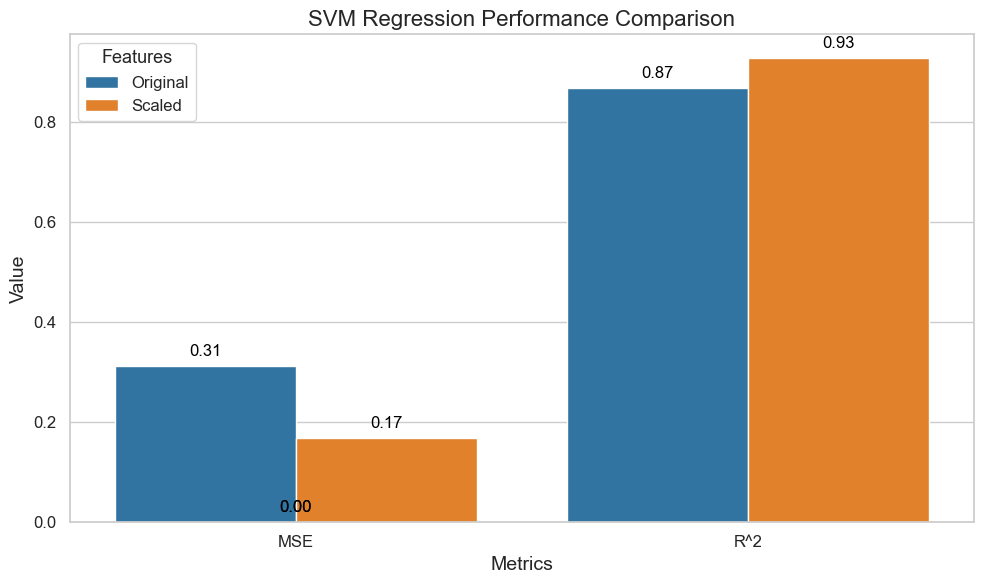

In [26]:

results = {
    'Metric': ['MSE', 'R^2'],
    'Original': [mse_svm, r2_svm],
    'Scaled': [mse_svm_scaled, r2_svm_scaled]
}

results_df = pd.DataFrame(results)

sns.set_theme(style="whitegrid")
custom_palette = ["#1f77b4", "#ff7f0e"]

melted_results = pd.melt(results_df, id_vars=['Metric'], var_name='Model', value_name='Value')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Metric', y='Value', hue='Model', data=melted_results, palette=custom_palette)


for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')


plt.title('SVM Regression Performance Comparison', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Features', fontsize=12, title_fontsize='13')
plt.tight_layout()

plt.show()